# CUSTOMER SATISFACTION

### The aim of the notebook is to analyse the satisfactory rate of the customers based on the reviews submitted.

# Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Reading the dataset

In [2]:
data = pd.read_csv("C:\OLIST\olist_reviews_dataset_new.csv")

# Analysis on the dataset

In [3]:
data.head()

,Unnamed: 0,review_id2,review_id,order_id,order_id2,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,PR31563,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,ON34305,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,1,PR84298,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,ON12238,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,2,PR41216,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,ON21442,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,3,PR80287,359d03e676b3c069f62cadba8dd3f6e8,949d5b44dbf5de918fe9c16f97b45f8a,ON36041,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,4,PR46847,e50934924e227544ba8246aeb3770dd4,ad21c59c0840e6cb83a9ceb5573f8159,ON16462,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [4]:
data.shape

(100002, 10)

In [5]:
data = data[['review_comment_message', 'review_score']].dropna()
data.head()

,review_comment_message,review_score
0,"Não testei o produto ainda, mas ele veio corre...",4.0
1,Muito bom o produto.,4.0
3,O produto foi exatamente o que eu esperava e e...,5.0
6,fiquei triste por n ter me atendido.,2.0
10,Aguardando retorno da loja,1.0


In [6]:
data.shape

(41753, 2)

In [7]:
data['review_comment_length'] = data['review_comment_message'].apply(len)
data.head()

,review_comment_message,review_score,review_comment_length
0,"Não testei o produto ainda, mas ele veio corre...",4.0,170
1,Muito bom o produto.,4.0,20
3,O produto foi exatamente o que eu esperava e e...,5.0,105
6,fiquei triste por n ter me atendido.,2.0,36
10,Aguardando retorno da loja,1.0,26


In [8]:
data.shape

(41753, 3)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41753 entries, 0 to 99998
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_comment_message  41753 non-null  object 
 1   review_score            41753 non-null  float64
 2   review_comment_length   41753 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [10]:
data.describe()

,review_score,review_comment_length
count,41753.000000,41753.000000
mean,3.640409,70.038584
std,1.626383,54.778094
min,1.000000,1.000000
25%,2.000000,28.000000
50%,4.000000,54.000000
75%,5.000000,97.000000
max,5.000000,208.000000


# Plots based on review score

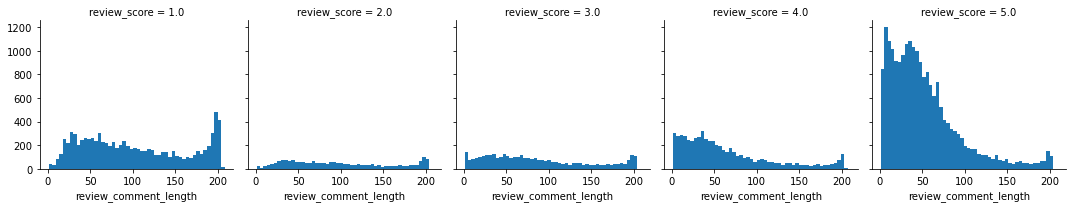

In [11]:
grid = sns.FacetGrid(data=data, col='review_score')
grid.map(plt.hist, 'review_comment_length', bins=50);

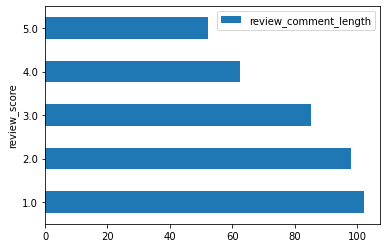

In [12]:
score = data.groupby('review_score').mean()
score.plot.barh();

In [13]:
review = data[['review_comment_message']]
review.head()

,review_comment_message
0,"Não testei o produto ainda, mas ele veio corre..."
1,Muito bom o produto.
3,O produto foi exatamente o que eu esperava e e...
6,fiquei triste por n ter me atendido.
10,Aguardando retorno da loja


In [14]:
text = review.to_string()

## Prerequisite : Installation of wordcloud package from conda

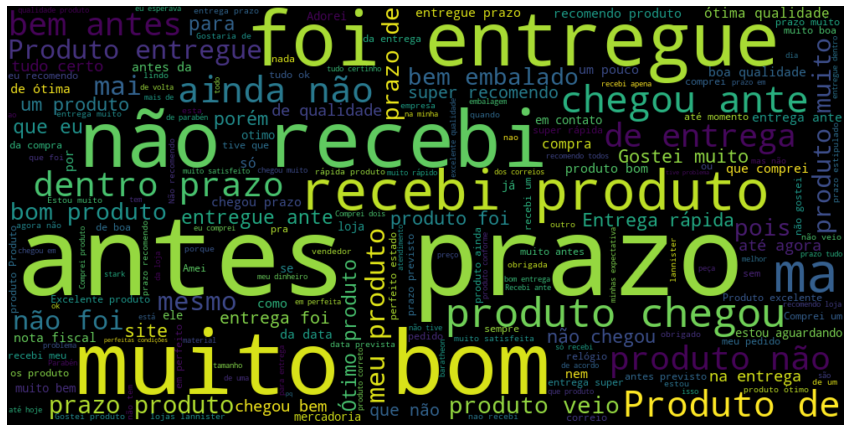

In [16]:
from wordcloud import WordCloud

wordcloudall = WordCloud(background_color='black',width=1000, height=500).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloudall, interpolation="bilinear")
plt.axis("off");

In [17]:
wordcloudall.to_file("allfeed.png")

# Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

vectorizer = TfidfVectorizer(max_features=100, ngram_range=(2, 4),
                             stop_words=stopwords.words('portuguese'))
vectorizer.fit(review['review_comment_message'])
X = vectorizer.transform(review['review_comment_message'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dimensionality reduction

### PCA(Principal Component Analysis) is used for dimensionality reduction which aids in reducing the processing time and enhances visuals as we have lots of feature

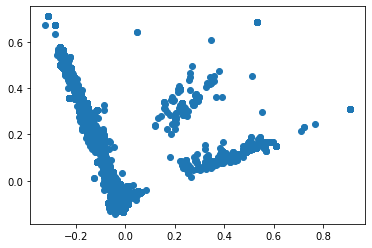

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(X.toarray())
X_pca = pca.transform(X.toarray())
plt.scatter(X_pca[:, 0], X_pca[:, 1]);

# Clustering

### We can see above that our data can be divided in two or more clusters. Due to the shape of our data maybe K-means isn't a good option, let's try to use a AgglomerativeClustering available in Scikit-Learn: Agglomerative Clustering is one of the most common hierarchical clustering techniques.

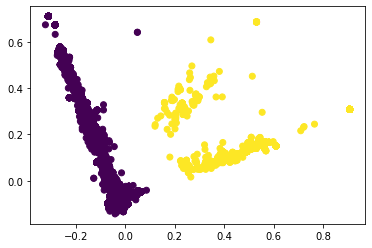

In [23]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
predicted = model.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted);

In [24]:
review['predicted'] = predicted
review.head()

,review_comment_message,predicted
0,"Não testei o produto ainda, mas ele veio corre...",0
1,Muito bom o produto.,0
3,O produto foi exatamente o que eu esperava e e...,0
6,fiquei triste por n ter me atendido.,0
10,Aguardando retorno da loja,0


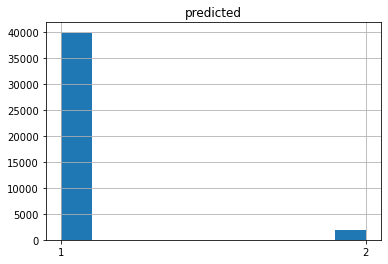

In [25]:
review[['predicted']].hist();
plt.xticks(np.arange(2), np.arange(1, 3));

# Reading images

In [50]:
from PIL import Image
import cv2
import random
from matplotlib import image
from matplotlib import pyplot

In [51]:
import imageio

In [31]:
#im = imageio.imread('C:\OLIST\Images\pond.png')

In [52]:
image = image.imread('C:\OLIST\Images\pond.png')

In [32]:
#im = ima.imread('C:\OLIST\Images\pond.png')

In [53]:
im = cv2.imread("C:\OLIST\Images\pond.png")

# Convert to HSV colorspace

In [54]:
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

# Define color range for masking
lower = np.array([0,100,100])
upper = np.array([20,255,255])


# Apply the mask
mask = cv2.inRange(hsv, lower, upper)

In [55]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(168, 100%%, %d%%)" % random.randint(60, 100)

In [56]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                  **kwargs):
    return "hsl(13, 100%%, %d%%)" % random.randint(40, 100)

In [61]:
#b_image = np.array(Image.open("C:\OLIST\Images\tond.png"))
b_image = np.array(Image.open("C:\OLIST\Images\pond.png"))

# Word Clouds of the Clusters

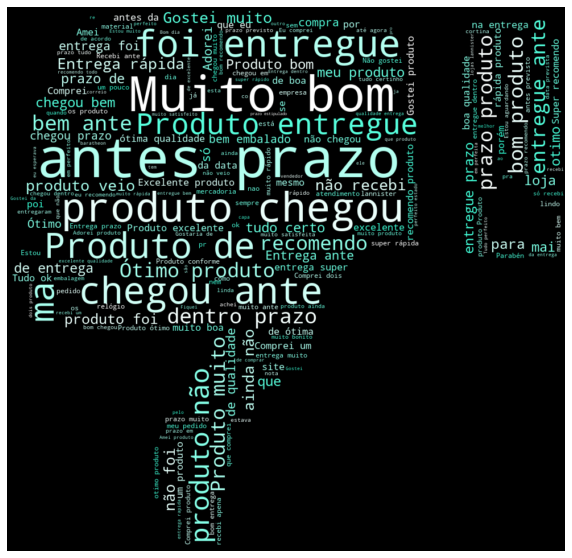

In [63]:
text = review[review['predicted'] == 0]['review_comment_message'].to_string()

wordcloud1 = WordCloud(background_color='black',mask =b_image,width=200, height=200).generate(text)
plt.figure(figsize=(10, 10))
wordcloud4 = wordcloud1.recolor(color_func=grey_color_func, random_state=3)
wordcloud4.to_file("reviewpos.png")
#plt.imshow(wordcloud1.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.imshow(wordcloud4, interpolation="bilinear")
plt.axis("off");

# CONCLUSION


### Looking at the word clouds we can see that the delivery time is very important for the customers. 
### The first cluster looks like good reviews that shows compliments and contentment mainly related to the early delivery of the products. 
